In [1]:
import pandas as pd
from PIL import Image
import io
import json
import matplotlib.pyplot as plt
import re
import tensorflow as tf

In [ ]:
parquet_file = [
    'data/train-00000-of-00004-b4aaeceff1d90ecb.parquet',
    'data/train-00001-of-00004-7dbbe248962764c5.parquet',
    'data/train-00002-of-00004-688fe1305a55e5cc.parquet',
    'data/train-00003-of-00004-2d0cd200555ed7fd.parquet'
    ]

df = pd.concat([pd.read_parquet(f) for f in parquet_file])

KeyboardInterrupt: 

In [ ]:
len(df)

800

In [ ]:
df.head()

image  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                                        ground_truth  
0  {"gt_parse": {"menu": [{"nm": "Nasi Campur Bal...  
1  {"gt_parse": {"menu": [{"nm": "SPGTHY BOLOGNAS...  
2  {"gt_parse": {"menu": [{"nm": "HAKAU UDANG", "...  
3  {"gt_parse": {"menu": [{"nm": "Bintang Bremer"...  
4  {"gt_parse": {"menu": {"nm": "BASO BIHUN", "un...

In [ ]:
df['ground_truth']

0      {"gt_parse": {"menu": [{"nm": "Nasi Campur Bal...
1      {"gt_parse": {"menu": [{"nm": "SPGTHY BOLOGNAS...
2      {"gt_parse": {"menu": [{"nm": "HAKAU UDANG", "...
3      {"gt_parse": {"menu": [{"nm": "Bintang Bremer"...
4      {"gt_parse": {"menu": {"nm": "BASO BIHUN", "un...
                             ...                        
195    {"gt_parse": {"menu": {"nm": "DIHUN CAMPUR", "...
196    {"gt_parse": {"menu": [{"nm": "1066-Choconut B...
197    {"gt_parse": {"menu": [{"nm": "GRILLED BABY PO...
198    {"gt_parse": {"menu": {"nm": "Lemon Tea (L).",...
199    {"gt_parse": {"menu": {"nm": "Es Kopi Rupa", "...
Name: ground_truth, Length: 800, dtype: object

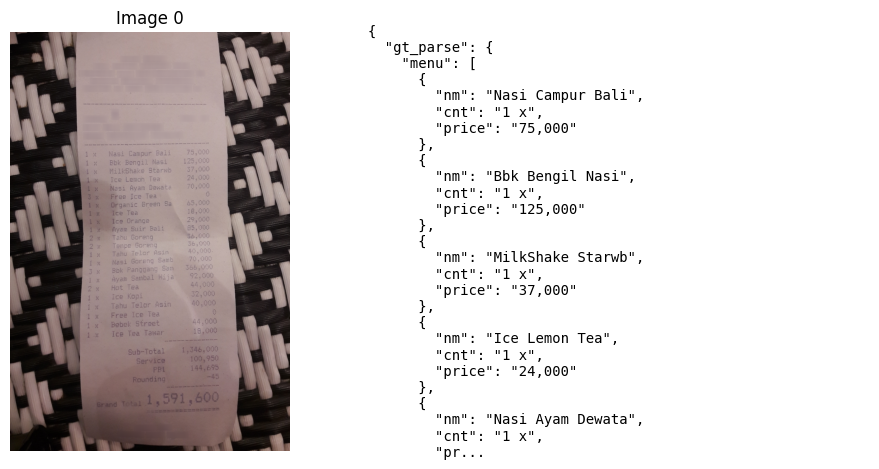

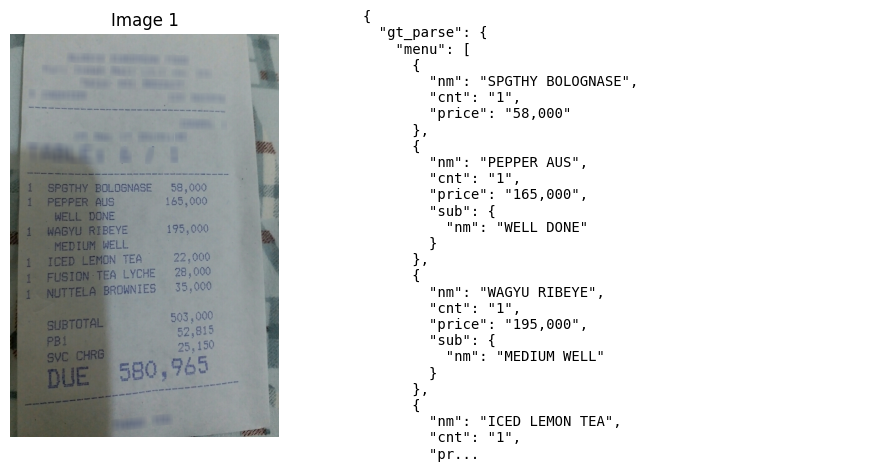

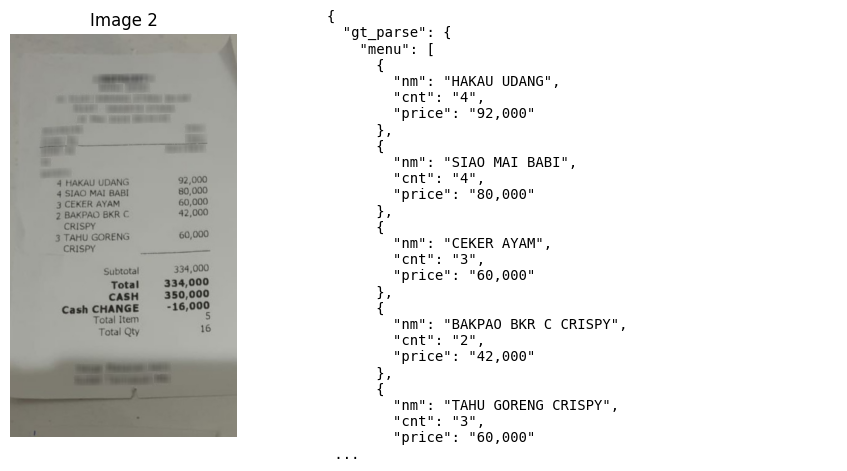

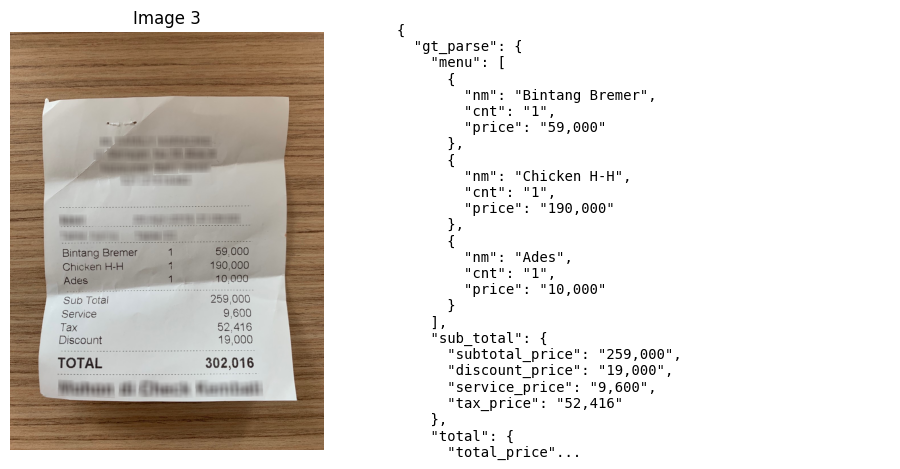

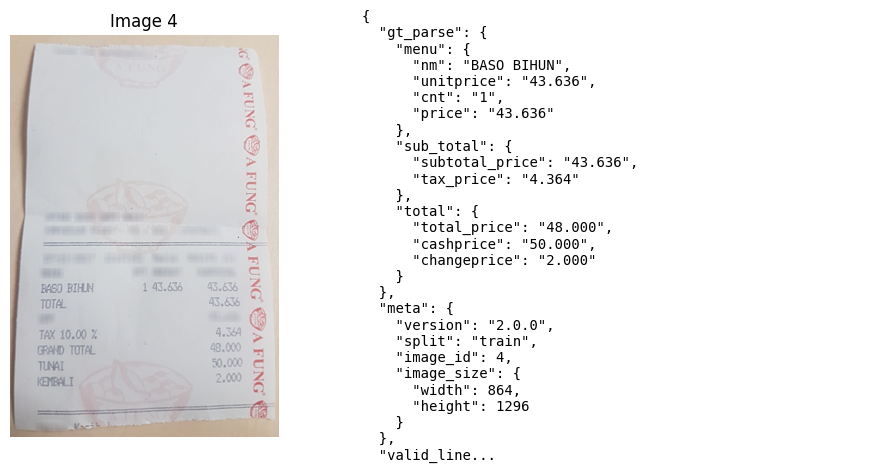

Full ground truth for image 4:
{
  "gt_parse": {
    "menu": {
      "nm": "BASO BIHUN",
      "unitprice": "43.636",
      "cnt": "1",
      "price": "43.636"
    },
    "sub_total": {
      "subtotal_price": "43.636",
      "tax_price": "4.364"
    },
    "total": {
      "total_price": "48.000",
      "cashprice": "50.000",
      "changeprice": "2.000"
    }
  },
  "meta": {
    "version": "2.0.0",
    "split": "train",
    "image_id": 4,
    "image_size": {
      "width": 864,
      "height": 1296
    }
  },
  "valid_line": [
    {
      "words": [
        {
          "quad": {
            "x2": 172,
            "y3": 836,
            "x3": 172,
            "y4": 836,
            "x1": 96,
            "y1": 800,
            "x4": 96,
            "y2": 800
          },
          "is_key": 0,
          "row_id": 2119099,
          "text": "BASO"
        },
        {
          "quad": {
            "x2": 272,
            "y3": 834,
            "x3": 272,
            "y4": 834,
       

In [ ]:
for index, row in df.head(5).iterrows():
    image_data = row['image']
    image = Image.open(io.BytesIO(image_data['bytes']))
    
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the image on the left side
    ax[0].imshow(image)
    ax[0].set_title(f"Image {index}")
    ax[0].axis('off')
    
    # Parse the ground truth JSON string to a Python object
    ground_truth = json.loads(row['ground_truth'])  # Parse JSON string to a Python dict
    formatted_gt = json.dumps(ground_truth, indent=2)  # Convert dict to pretty JSON string
    
    # Display the JSON-formatted ground truth on the right side
    truncated_gt = (formatted_gt[:500] + '...') if len(formatted_gt) > 500 else formatted_gt
    ax[1].text(0, 0.5, truncated_gt, wrap=True, fontsize=10, verticalalignment='center', 
               family='monospace', transform=ax[1].transAxes)  # Use monospace font for JSON
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()

    if index == 4:  # Change this to any other index if needed
        print(f"Full ground truth for image {index}:\n{formatted_gt}\n")

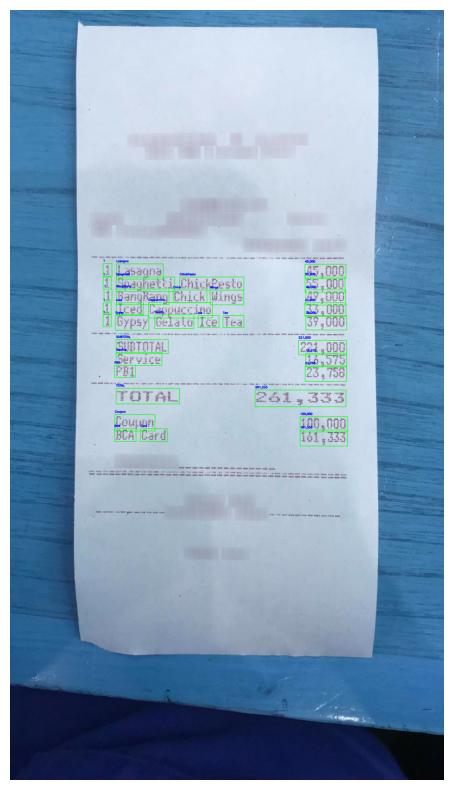

In [ ]:
import json
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def display_image_with_labels(image_data, label_data, box_color=(0, 255, 0), text_color=(255, 0, 0), thickness=2, font_scale=0.5):
    """
    Menampilkan gambar dengan bounding box dan label teks menggunakan Matplotlib.
    
    Parameters:
    - image_data (dict): Data gambar dalam format bytes.
    - label_data (dict): Data label dalam format dictionary, berisi koordinat bounding box dan teks.
    - box_color (tuple): Warna bounding box (BGR).
    - text_color (tuple): Warna teks (BGR).
    - thickness (int): Ketebalan garis bounding box.
    - font_scale (float): Skala ukuran font untuk teks label.
    """
    
    # Load image and convert to OpenCV format
    image = image_data
    # image = Image.open(io.BytesIO(image_data['bytes']))
    # image = np.array(image)  # Convert PIL image to NumPy array
    
    # Set font for text
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Parse valid_line dan buat bounding box
    for line in label_data:
        for word in line['words']:
            quad = word['quad']
            
            # Define bounding box from the quad
            top_left = (quad['x1'], quad['y1'])
            bottom_right = (quad['x3'], quad['y3'])
            
            # Draw bounding box
            cv2.rectangle(image, top_left, bottom_right, box_color, thickness)
            
            # Write text label near the box
            text = word['text']
            cv2.putText(image, text, (quad['x1'], quad['y1'] - 10), font, font_scale, text_color, thickness)
    
    # Convert BGR to RGB for displaying in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()

# Contoh penggunaan
index = 5
ground_truth = json.loads(df.iloc[index]['ground_truth'])  # Parse JSON string to a Python dict
image_data = df.iloc[index]['image']
image = Image.open(io.BytesIO(image_data['bytes']))
image_data = np.array(image)  
display_image_with_labels(image_data, ground_truth['valid_line'])


In [ ]:
def get_dimensions(image_data):
    image = Image.open(io.BytesIO(image_data['bytes']))
    return image.size

In [ ]:
df['image_dimensions'] = df['image'].apply(get_dimensions)

df[['image_dimensions']].drop_duplicates(subset=['image_dimensions'])

image_dimensions
0        (864, 1296)
2        (720, 1280)
3       (1108, 1478)
5       (2304, 4096)
10        (432, 648)
..               ...
148       (268, 478)
180      (700, 1280)
184      (534, 1280)
190     (1511, 2772)
199     (1551, 2701)

[63 rows x 1 columns]

In [ ]:
#augmentation


In [ ]:
# Fungsi untuk melakukan preprocessing dan menghapus objek tertentu pada JSON
def preprocess_json(json_data, keys_to_remove=None, keys_to_remove_2=None):
    if keys_to_remove is None:
        keys_to_remove = ["category", "group_id", "sub_group_id"]  # Tentukan key yang ingin dihapus
    if keys_to_remove_2 is None:
        keys_to_remove_2 = ["is_key", "row_id"]  # Tentukan key yang ingin dihapus
    
    # Parse JSON string menjadi dictionary
    parsed_json = json.loads(json_data)
    
    # Menghapus keys tertentu dalam "menu" untuk setiap item
    for item in parsed_json['valid_line']:
        for key in keys_to_remove:
            item.pop(key, None)  # Hapus key jika ada
        for quad in item['words']:
            for key_2 in keys_to_remove_2:
                quad.pop(key_2, None)  # Hapus key jika ada 

    # Mengembalikan JSON yang sudah dimodifikasi sebagai string
    return parsed_json['valid_line']

# Terapkan preprocessing ke setiap entri dalam kolom `ground_truth`
df['kotak'] = df['ground_truth'].apply(lambda x: preprocess_json(x))

# Tampilkan hasil
df['kotak'].head()


0    [{'words': [{'quad': {'x2': 244, 'y3': 390, 'x...
1    [{'words': [{'quad': {'x2': 74, 'y3': 512, 'x3...
2    [{'words': [{'quad': {'x2': 272, 'y3': 489, 'x...
3    [{'words': [{'quad': {'x2': 317, 'y3': 806, 'x...
4    [{'words': [{'quad': {'x2': 172, 'y3': 836, 'x...
Name: kotak, dtype: object

In [ ]:
df.iloc[0]['kotak']

[{'words': [{'quad': {'x2': 244,
     'y3': 390,
     'x3': 244,
     'y4': 390,
     'x1': 232,
     'y1': 372,
     'x4': 232,
     'y2': 372},
    'text': '1'},
   {'quad': {'x2': 270,
     'y3': 390,
     'x3': 270,
     'y4': 390,
     'x1': 256,
     'y1': 374,
     'x4': 256,
     'y2': 374},
    'text': 'x'}]},
 {'words': [{'quad': {'x2': 354,
     'y3': 390,
     'x3': 354,
     'y4': 390,
     'x1': 302,
     'y1': 368,
     'x4': 302,
     'y2': 368},
    'text': 'Nasi'},
   {'quad': {'x2': 440,
     'y3': 391,
     'x3': 439,
     'y4': 388,
     'x1': 364,
     'y1': 365,
     'x4': 363,
     'y2': 368},
    'text': 'Campur'},
   {'quad': {'x2': 497,
     'y3': 385,
     'x3': 499,
     'y4': 388,
     'x1': 446,
     'y1': 365,
     'x4': 448,
     'y2': 362},
    'text': 'Bali'}]},
 {'words': [{'quad': {'x2': 618,
     'y3': 388,
     'x3': 618,
     'y4': 388,
     'x1': 542,
     'y1': 362,
     'x4': 542,
     'y2': 362},
    'text': '75,000'}]},
 {'words': [{'quad': 

Tesseract 

In [ ]:
from shapely.geometry import Polygon

# Fungsi untuk menghitung Intersection over Union (IoU) dari dua bounding boxes
def calculate_iou(quad_gt, quad_pred):
    # Mengonversi koordinat quad menjadi Polygon Shapely
    poly_gt = Polygon([(quad_gt['x1'], quad_gt['y1']), (quad_gt['x2'], quad_gt['y2']), 
                       (quad_gt['x3'], quad_gt['y3']), (quad_gt['x4'], quad_gt['y4'])])
    poly_pred = Polygon([(quad_pred['x1'], quad_pred['y1']), (quad_pred['x2'], quad_pred['y2']),
                         (quad_pred['x3'], quad_pred['y3']), (quad_pred['x4'], quad_pred['y4'])])
    
    # Menghitung area intersection dan union
    intersection = poly_gt.intersection(poly_pred).area
    union = poly_gt.union(poly_pred).area
    iou = intersection / union if union != 0 else 0
    return iou

# Fungsi evaluasi precision, recall, dan IoU
def evaluate_ocr(dataset, predictions, iou_threshold=0.5):
    true_positive = 0
    false_positive = 0
    false_negative = 0
    iou_scores = []

    for item_gt in dataset:
        matched = False
        for item_pred in predictions:
            for word_gt in item_gt['words']:
                for word_pred in item_pred['words']:
                    # Memeriksa apakah teksnya cocok
                    if word_gt['text'].lower() == word_pred['text'].lower():
                        iou = calculate_iou(word_gt['quad'], word_pred['quad'])
                        iou_scores.append(iou)
                        
                        # Jika IoU memenuhi ambang batas, hitung sebagai true positive
                        if iou >= iou_threshold:
                            true_positive += 1
                            matched = True
                            break
                if matched:
                    break
        if not matched:
            # Jika tidak ada kecocokan, hitung sebagai false negative
            false_negative += 1

    # Hitung false positive
    for item_pred in predictions:
        matched = False
        for item_gt in dataset:
            for word_pred in item_pred['words']:
                for word_gt in item_gt['words']:
                    # Memeriksa apakah teksnya cocok
                    if word_pred['text'].lower() == word_gt['text'].lower():
                        iou = calculate_iou(word_gt['quad'], word_pred['quad'])
                        
                        if iou >= iou_threshold:
                            matched = True
                            break
                if matched:
                    break
        if not matched:
            # Jika prediksi tidak ada di ground truth, hitung sebagai false positive
            false_positive += 1

    # Menghitung Precision, Recall, dan F1-score
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    avg_iou = sum(iou_scores) / len(iou_scores) if iou_scores else 0

    return {
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "average_iou": avg_iou
    }

Hasil evaluasi OCR: {'precision': 0.0, 'recall': 0.0, 'f1_score': 0, 'average_iou': 0.0}


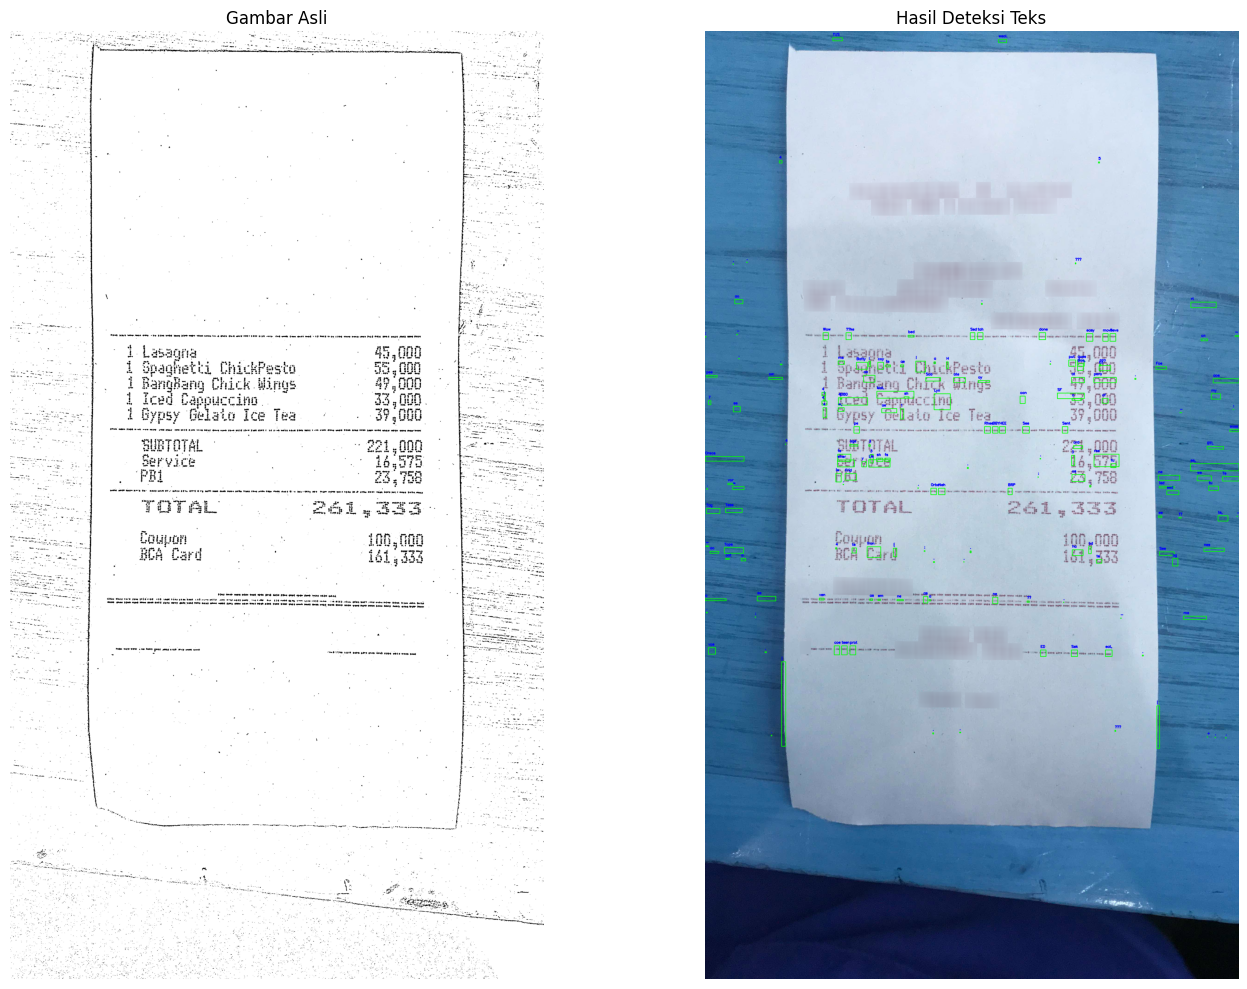

Hasil ekstraksi telah disimpan ke receipt_output.json


In [ ]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import json
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt

class ReceiptOCR:
    def __init__(self):
        # Konfigurasi path Tesseract jika diperlukan
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Untuk Windows
        pass

    def preprocess_image(self, image) -> np.ndarray:
        """
        Memproses gambar untuk meningkatkan akurasi OCR
        """
        # Baca gambar
        image = image

        # Konversi ke grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding
        binary = cv2.adaptiveThreshold(
            gray, 
            255, 
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 
            21, 
            10
        )
        
        # Tingkatkan kontras menggunakan CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(binary)
        
        # Sharpening menggunakan unsharp masking
        gaussian_blur = cv2.GaussianBlur(enhanced, (0, 0), 3.0)
        sharpened = cv2.addWeighted(enhanced, 1.5, gaussian_blur, -0.5, 0)
        # Reduce noise
        denoised = cv2.fastNlMeansDenoising(sharpened)
        
        return denoised


    def extract_text_and_location(self, image) -> Tuple[List[Dict], np.ndarray]:
        """
        Mengekstrak teks dan lokasinya dari gambar struck
        """
        # Proses gambar
        processed_image = self.preprocess_image(image)
        
        # Buat salinan gambar untuk visualisasi
        visualization_image = image.copy()
        
        # Ekstrak data dengan Tesseract
        receipt_data = []
        
        # Gunakan Tesseract dengan output dictionary
        custom_config = r'--oem 3 --psm 6 --dpi 300'
        data = pytesseract.image_to_data(processed_image, output_type=pytesseract.Output.DICT, config=custom_config)
        n_boxes = len(data['text'])
        for i in range(n_boxes):
            # Skip empty text atau spasi
            if int(data['conf'][i]) > 30 and data['text'][i].strip() != '':
                # Dapatkan koordinat
                x = data['left'][i]
                y = data['top'][i]
                w = data['width'][i]
                h = data['height'][i]
                
                # Gambar kotak dan teks pada gambar visualisasi
                cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(visualization_image, data['text'][i], 
                          (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                          0.5, (255, 0, 0), 2)
                
                # Buat format yang mirip dengan contoh input
                word_data = {
                    "words": [{
                        "quad": {
                            "x1": x,
                            "y1": y,
                            "x2": x + w,
                            "y2": y,
                            "x3": x + w,
                            "y3": y + h,
                            "x4": x,
                            "y4": y + h
                        },
                        "text": data['text'][i],
                        # "confidence": data['conf'][i]
                    }],
                }
                receipt_data.append(word_data)
        
        return receipt_data, visualization_image


    def save_to_json(self, data: List[Dict], output_path: str):
        """
        Menyimpan hasil ekstraksi ke file JSON
        """
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump({"valid_line": data}, f, indent=2, ensure_ascii=False)

    def visualize_results(self, original_image: np.ndarray, visualization_image: np.ndarray):
        """
        Menampilkan hasil deteksi teks menggunakan matplotlib
        """
        plt.figure(figsize=(15, 10))
        
        # Tampilkan gambar asli
        plt.subplot(1, 2, 1)
        plt.title('Gambar Asli')
        plt.imshow(cv2.cvtColor(self.preprocess_image(original_image), cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        # Tampilkan gambar dengan hasil deteksi
        plt.subplot(1, 2, 2)
        plt.title('Hasil Deteksi Teks')
        plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

def main():
    # Contoh penggunaan
    ocr = ReceiptOCR()
    index = 5
    image_data = df.iloc[index]['image']
    image = Image.open(io.BytesIO(image_data['bytes']))
    image_data = np.array(image)
    
    # Ekstrak teks dan lokasi
    receipt_data, visualization_image = ocr.extract_text_and_location(image_data)

    dataset_gt = df['kotak'].iloc[index]
    predictions = receipt_data

    # Evaluasi
    results = evaluate_ocr(dataset_gt, predictions)
    print("Hasil evaluasi OCR:", results)

        # Tampilkan hasil deteksi
    ocr.visualize_results(image_data, visualization_image)
    
    # Simpan hasil ke JSON
    output_path = "receipt_output.json"
    ocr.save_to_json(receipt_data, output_path)

    print(f"Hasil ekstraksi telah disimpan ke {output_path}")

if __name__ == "__main__":
    main()

In [ ]:


# Contoh penggunaan fungsi
ocr = ReceiptOCR()
index = 0
image_data = df.iloc[index]['image']
image = Image.open(io.BytesIO(image_data['bytes']))
image_data = np.array(image)
    
    # Ekstrak teks dan lokasi    
receipt_data, visualization_image = ocr.extract_text_and_location(image_data)
# Misalkan dataset_gt adalah ground truth dan predictions adalah hasil prediksi
dataset_gt = df['kotak'].iloc[index]
predictions = receipt_data



# Evaluasi
results = evaluate_ocr(dataset_gt, predictions)
print("Hasil evaluasi OCR:", results)


Hasil evaluasi OCR: {'precision': 0.2740740740740741, 'recall': 0.5211267605633803, 'f1_score': 0.35922330097087374, 'average_iou': 0.1406399033028898}


In [ ]:
# Inisialisasi objek OCR
ocr = ReceiptOCR()

# List untuk menyimpan hasil evaluasi untuk setiap gambar
evaluation_results = []

# Loop melalui setiap data dalam dataset df
for index, row in df.iterrows():
    # Baca gambar dari dataset
    image_data = row['image']
    image = Image.open(io.BytesIO(image_data['bytes']))
    image_array = np.array(image)
    
    # Ekstrak teks dan lokasi
    receipt_data, _ = ocr.extract_text_and_location(image_array)
    
    # Ground truth untuk gambar ini
    ground_truth = row['kotak']
    
    # Evaluasi OCR untuk gambar ini
    result = evaluate_ocr(ground_truth, receipt_data)
    evaluation_results.append(result)
    
    # Print hasil evaluasi untuk setiap gambar (opsional)
    print(f"Hasil evaluasi OCR untuk gambar index {index}:", result)


Hasil evaluasi OCR untuk gambar index 0: {'precision': 0.2740740740740741, 'recall': 0.5211267605633803, 'f1_score': 0.35922330097087374, 'average_iou': 0.1406399033028898}
Hasil evaluasi OCR untuk gambar index 1: {'precision': 0.0784313725490196, 'recall': 0.16666666666666666, 'f1_score': 0.10666666666666666, 'average_iou': 0.8199362556127956}
Hasil evaluasi OCR untuk gambar index 2: {'precision': 0.9130434782608695, 'recall': 1.0, 'f1_score': 0.9545454545454545, 'average_iou': 0.4405266733657998}
Hasil evaluasi OCR untuk gambar index 3: {'precision': 0.47058823529411764, 'recall': 0.5714285714285714, 'f1_score': 0.5161290322580646, 'average_iou': 0.6518831438084078}
Hasil evaluasi OCR untuk gambar index 4: {'precision': 0.11538461538461539, 'recall': 0.3333333333333333, 'f1_score': 0.17142857142857146, 'average_iou': 0.5288205003787202}
Hasil evaluasi OCR untuk gambar index 5: {'precision': 0.0, 'recall': 0.0, 'f1_score': 0, 'average_iou': 0.0}
Hasil evaluasi OCR untuk gambar index 6

KeyboardInterrupt: 

In [ ]:
# Menampilkan rata-rata hasil evaluasi dari seluruh gambar
average_precision = sum([res['precision'] for res in evaluation_results]) / len(evaluation_results)
average_recall = sum([res['recall'] for res in evaluation_results]) / len(evaluation_results)
average_f1_score = sum([res['f1_score'] for res in evaluation_results]) / len(evaluation_results)
average_iou = sum([res['average_iou'] for res in evaluation_results]) / len(evaluation_results)

print("\nRata-rata hasil evaluasi OCR:")
print("Precision:", average_precision)
print("Recall:", average_recall)
print("F1 Score:", average_f1_score)
print("Average IoU:", average_iou)


NameError: name 'evaluation_results' is not defined

In [ ]:
# import the necessary packages
from imutils.perspective import four_point_transform
import pytesseract
import argparse
import imutils
import cv2
import re

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input receipt image")
ap.add_argument("-d", "--debug", type=int, default=-1,
	help="whether or not we are visualizing each step of the pipeline")
args = vars(ap.parse_args())

# load the input image from disk, resize it, and compute the ratio
# of the *new* width to the *old* width
orig = cv2.imread(args["image"])
image = orig.copy()
image = imutils.resize(image, width=500)
ratio = orig.shape[1] / float(image.shape[1])

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
# check to see if we should show the output of our edge detection
# procedure
if args["debug"] > 0:
	cv2.imshow("Input", image)
	cv2.imshow("Edged", edged)
	cv2.waitKey(0)
	
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# initialize a contour that corresponds to the receipt outline
receiptCnt = None
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if our approximated contour has four points, then we can
	# assume we have found the outline of the receipt
	if len(approx) == 4:
		receiptCnt = approx
		break
# if the receipt contour is empty then our script could not find the
# outline and we should be notified
if receiptCnt is None:
	raise Exception(("Could not find receipt outline. "
		"Try debugging your edge detection and contour steps."))

# check to see if we should draw the contour of the receipt on the
# image and then display it to our screen
if args["debug"] > 0:
	output = image.copy()
	cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
	cv2.imshow("Receipt Outline", output)
	cv2.waitKey(0)
# apply a four-point perspective transform to the *original* image to
# obtain a top-down bird's-eye view of the receipt
receipt = four_point_transform(orig, receiptCnt.reshape(4, 2) * ratio)
# show transformed image
cv2.imshow("Receipt Transform", imutils.resize(receipt, width=500))
cv2.waitKey(0)

# apply OCR to the receipt image by assuming column data, ensuring
# the text is *concatenated across the row* (additionally, for your
# own images you may need to apply additional processing to cleanup
# the image, including resizing, thresholding, etc.)
options = "--psm 4"
text = pytesseract.image_to_string(
	cv2.cvtColor(receipt, cv2.COLOR_BGR2RGB),
	config=options)
# show the raw output of the OCR process
print("[INFO] raw output:")
print("==================")
print(text)
print("\n")

# define a regular expression that will match line items that include
# a price component
pricePattern = r'([0-9]+\.[0-9]+)'
# show the output of filtering out *only* the line items in the
# receipt
print("[INFO] price line items:")
print("========================")
# loop over each of the line items in the OCR'd receipt
for row in text.split("\n"):
	# check to see if the price regular expression matches the current
	# row
	if re.search(pricePattern, row) is not None:
		print(row)

usage: ipykernel_launcher.py [-h] -i IMAGE [-d DEBUG]
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

[INFO] Processing Details:
original_size: (4096, 2304, 3)
processed_size: (1498, 843, 3)
scale_ratio: 2.7330960854092528
size_category: large


[INFO] Extracted Text:
om ; - _ w gant none te 9 wah ne arse aves tm HOG TIP eects pee ens cab ntsc she soma ma me ae et ee me fo _ va cal.
oe - 4s aes oehs Phd Be fit oe ed ink ae ce
. Poe ghia a 7 gk BMY gon eee gy . se gees . Se
oe a 2 ov os . a. Be : en tere
DO ee f. i OK tn eet tery Cr sud. Bs epeete As ot ’ , .. . oe
- ; 7 Ton om tt feces yee a BE ae ts ~ a
ao woes 4 a. gt 4 2 — “— pry # py et aoe - a
ce TTT? ater ee ae Ee | eae A cota voy ; ott bf eet Se ° -
nee er oO pace wenn oone wcan cen cane cae etal ew ecrn on een ane sce geen ante es AES eens na mmm meen aor = ce _ ° we
cee . “ act - cen: thee :
SO ee Pt 4 ; oo ggeg Comet ee
ee vse ; ae! 8 Fite a wae
: wll . nn wove anes word FO! wren even rate eae tenn tn ES vanes soe wero nna nun ve ert ese va erm mn 04 8 os a .
rt a soeagee gh wagers ot - B a ne ate me a :
ne eee 3 of £ & aes o

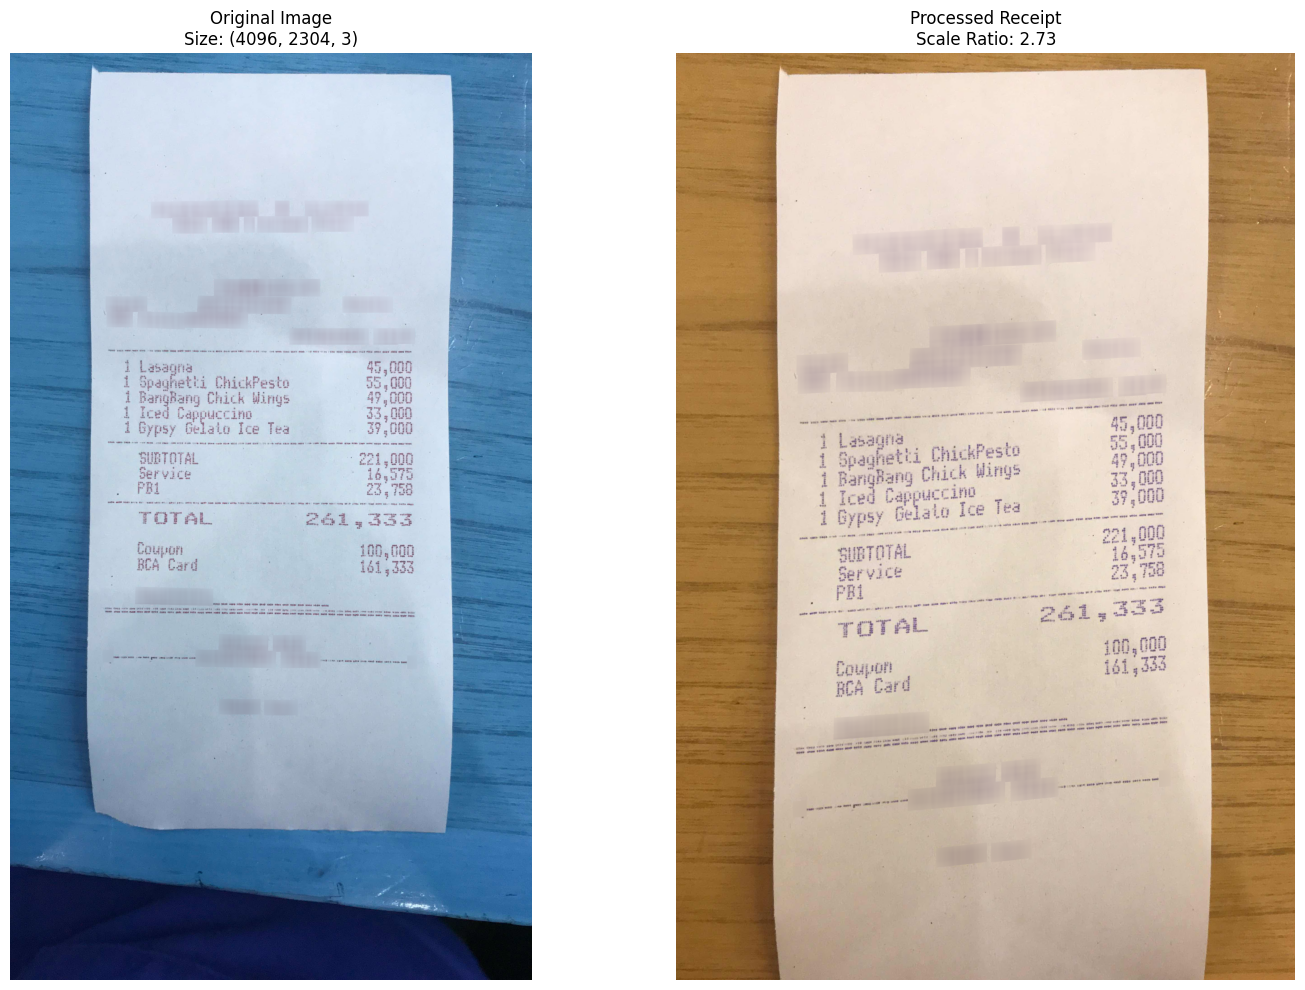

In [ ]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import io
import imutils
from imutils.perspective import four_point_transform
from typing import Tuple, Optional, Dict

class AdaptiveReceiptScanner:
    def __init__(self):
        """
        Initialize Receipt Scanner with adaptive parameters
        """
        self.min_width = 300
        self.max_width = 1000
        self.target_dpi = 300
        self.psm_config = "--psm 6"
        self.edge_params = {
            'small': {'low': 50, 'high': 150},
            'medium': {'low': 75, 'high': 200},
            'large': {'low': 100, 'high': 250}
        }
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

    def determine_image_size_category(self, image: np.ndarray) -> str:
        """
        Determine image size category based on dimensions
        """
        height, width = image.shape[:2]
        area = height * width
        
        if area < 300000:  # e.g. smaller than 500x600
            return 'small'
        elif area > 1000000:  # e.g. larger than 1000x1000
            return 'large'
        else:
            return 'medium'

    def calculate_optimal_size(self, image: np.ndarray) -> Tuple[int, float]:
        """
        Calculate optimal size for processing based on image dimensions
        
        Returns:
            Tuple of target width and scale ratio
        """
        height, width = image.shape[:2]
        aspect_ratio = height / width
        
        # Calculate target width based on image size
        if width < self.min_width:
            target_width = self.min_width
        elif width > self.max_width:
            target_width = self.max_width
        else:
            target_width = width
            
        # Adjust target width if resulting height would be too extreme
        target_height = int(target_width * aspect_ratio)
        if target_height > self.max_width * 1.5:
            target_width = int(self.max_width * 1.5 / aspect_ratio)
        
        scale_ratio = width / target_width
        return target_width, scale_ratio

    def preprocess_image(self, image: np.ndarray) -> Tuple[np.ndarray, float]:
        """
        Preprocess image with adaptive parameters
        """
        # Calculate optimal size
        target_width, ratio = self.calculate_optimal_size(image)
        
        # Resize image
        processed = imutils.resize(image.copy(), width=target_width)
        
        # Apply adaptive preprocessing based on image size
        size_category = self.determine_image_size_category(image)
        if size_category == 'small':
            # For small images, apply additional sharpening
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            processed = cv2.filter2D(processed, -1, kernel)
        elif size_category == 'large':
            # For large images, apply additional smoothing
            processed = cv2.GaussianBlur(processed, (3, 3), 0)
            
        return processed, ratio

    def detect_edges(self, image: np.ndarray) -> np.ndarray:
        """
        Detect edges with adaptive parameters
        """
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Determine size category and get appropriate edge parameters
        size_category = self.determine_image_size_category(image)
        edge_params = self.edge_params[size_category]
        
        # Apply adaptive threshold
        thresh = cv2.adaptiveThreshold(
            gray,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            11,
            2
        )
        
        # Apply edge detection with size-specific parameters
        edged = cv2.Canny(
            thresh,
            edge_params['low'],
            edge_params['high']
        )
        
        # Dilate edges to connect broken contours
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        edged = cv2.dilate(edged, kernel, iterations=1)
        
        return edged

    def find_receipt_contour(self, edged: np.ndarray, original_image: np.ndarray) -> Optional[np.ndarray]:
        """
        Find receipt contour with adaptive contour filtering
        """
        # Find contours
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        
        if not cnts:
            return None
            
        # Filter contours based on image size
        img_area = original_image.shape[0] * original_image.shape[1]
        filtered_cnts = []
        
        for c in cnts:
            area = cv2.contourArea(c)
            # Filter out contours that are too small or too large
            if area > img_area * 0.1 and area < img_area * 0.95:
                filtered_cnts.append(c)
        
        if not filtered_cnts:
            return None
            
        # Sort filtered contours by area
        filtered_cnts = sorted(filtered_cnts, key=cv2.contourArea, reverse=True)
        
        # Try to find a rectangular contour
        for c in filtered_cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            
            if len(approx) == 4:
                return approx
                
        return None

    def enhance_receipt_image(self, receipt: np.ndarray) -> np.ndarray:
        """
        Enhance the transformed receipt image for better OCR
        """
        # Convert to grayscale
        gray = cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY)
        
        # Apply adaptive threshold
        thresh = cv2.adaptiveThreshold(
            gray,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            21,
            10
        )
        
        # Apply denoising
        denoised = cv2.fastNlMeansDenoising(thresh, None, 10, 7, 21)
        
        return denoised

    def process_receipt(self, image_data: Dict) -> Tuple[str, np.ndarray, Dict]:
        """
        Process receipt image with adaptive parameters and return detailed results
        """
        # Convert image data to numpy array
        image = Image.open(io.BytesIO(image_data['bytes']))
        image = np.array(image)
        
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Store original image
        original = image.copy()
        
        # Preprocess image
        processed, ratio = self.preprocess_image(image)
        
        # Detect edges
        edged = self.detect_edges(processed)
        
        # Find receipt contour
        receipt_cnt = self.find_receipt_contour(edged, processed)
        
        if receipt_cnt is None:
            receipt = original
        else:
            receipt = four_point_transform(original, receipt_cnt.reshape(4, 2) * ratio)
        
        
        # Apply perspective transform
        # receipt = original
        # receipt = four_point_transform(original, receipt_cnt.reshape(4, 2) * ratio)
        
        # Enhance receipt image
        enhanced_receipt = self.enhance_receipt_image(receipt)
        
        # Extract text using OCR
        text = pytesseract.image_to_string(
            enhanced_receipt,
            config=self.psm_config
        )
        
        # Prepare debug info
        debug_info = {
            'original_size': original.shape,
            'processed_size': processed.shape,
            'scale_ratio': ratio,
            'size_category': self.determine_image_size_category(original)
        }
        
        return text, receipt, debug_info

    def visualize_results(self, original: np.ndarray, processed: np.ndarray, debug_info: Dict):
        """
        Visualize results with debug information
        """
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(15, 10))
        
        plt.subplot(1, 2, 1)
        plt.title(f'Original Image\nSize: {debug_info["original_size"]}')
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title(f'Processed Receipt\nScale Ratio: {debug_info["scale_ratio"]:.2f}')
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

def main(df, index=0):
    """
    Main function with error handling and debug info
    """
    try:
        scanner = AdaptiveReceiptScanner()
        
        # Get image data
        image_data = df.iloc[index]['image']
        
        # Process receipt
        text, processed_image, debug_info = scanner.process_receipt(image_data)
        
        # Print debug info
        print("[INFO] Processing Details:")
        print("========================")
        for key, value in debug_info.items():
            print(f"{key}: {value}")
        print("\n")
        
        # Print extracted text
        print("[INFO] Extracted Text:")
        print("=====================")
        print(text)
        print("\n")
        
        # Visualize results
        original_image = np.array(Image.open(io.BytesIO(image_data['bytes'])))
        scanner.visualize_results(original_image, processed_image, debug_info)
        
    except Exception as e:
        print(f"Error processing receipt: {str(e)}")

if __name__ == "__main__":
    # Example usage:
    main(df, index=5)
    pass

Teks pada gambar:
 ~ Por mr wr ER ee Dose TUS wh Weems LiLo . Te ae weal. ae see : ba cae !
. 4 5 aan : ae oo oe -
. . a ‘ Pods . ue
. ao . . ety Z . rt wise
: us - SN RNY Wow Se HOF «ke DLL NORE item DIY OOS Feat nowy bed de He ene AEE LITE OS -aty Sed tah tinin eeed aed SA ROHN nay FEE done mene men mak OMe sna easy auan move Seve Met on “3 _ ~
. racgs 7% woe
oT . . ‘. . ms ; a oe i a H tt 2 . put ques ‘ fat _ i
- . . tT Fan Ug Batty fie coy fe oe ae “pa gth lay 2 tty Bae, EE oe Foe .
pee TIN oe: eon ae Sob ate oy at O pera . . - aoe
; Ts : 4 FF Mat, ‘ SF AW Te my Te
: sae i i tas sh ae ae oan a af - ST
7 4 4080 LaGoucc Lyn 2a, TRAD. eee
ae ee - 4 =, ee ae 1 : os vO . Sey Ske . - - :
wenn Sete TL PAN OOS POE Oe oe mEPe pe ehed: HE LED OS Om bOLd foreman Hoan HIE IR Foeh GUE LUE Biah ETS Rhee BBY HEE 1-00 FOO See bh DEEN On EEUY Sent anh aha rae core wate beat Te aera 7 sass
- . 4 age 3 : : ard ae BTL -
Oreos , fe e fa 3 sh fs . , 3 ‘ ree . 0 EET reset 4
see a wher y Lie . .. AQ ageb 

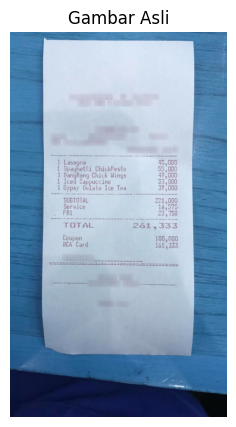

In [ ]:
import cv2
import pytesseract
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

class ImageTextExtractor:
    def __init__(self):
        # Konfigurasi path Tesseract jika diperlukan
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Untuk Windows

    def preprocess_image(self, image) -> np.ndarray:
        """
        Memproses gambar untuk meningkatkan akurasi OCR
        """
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        binary = cv2.adaptiveThreshold(
            gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10
        )
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced = clahe.apply(binary)
        gaussian_blur = cv2.GaussianBlur(enhanced, (0, 0), 3.0)
        sharpened = cv2.addWeighted(enhanced, 1.5, gaussian_blur, -0.5, 0)
        denoised = cv2.fastNlMeansDenoising(sharpened)
        return denoised

    def extract_text(self, image) -> str:
        """
        Mengekstrak teks dari gambar yang sudah diproses
        """
        processed_image = self.preprocess_image(image)
        config = '--oem 3 --psm 6'
        # Ekstrak teks
        text = pytesseract.image_to_string(processed_image, lang='eng', config=config)
        return text

def main():
    extractor = ImageTextExtractor()
    index = 5
    image_data = df.iloc[index]['image']
    image = Image.open(io.BytesIO(image_data['bytes']))
    image_data = np.array(image)

    # Ekstrak teks dari gambar
    text = extractor.extract_text(image_data)
    print("Teks pada gambar:\n", text)

    # Tampilkan gambar asli
    plt.figure(figsize=(10, 5))
    plt.title("Gambar Asli")
    plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Hasil evaluasi OCR: {'precision': 0, 'recall': 0.0, 'f1_score': 0, 'average_iou': 0}


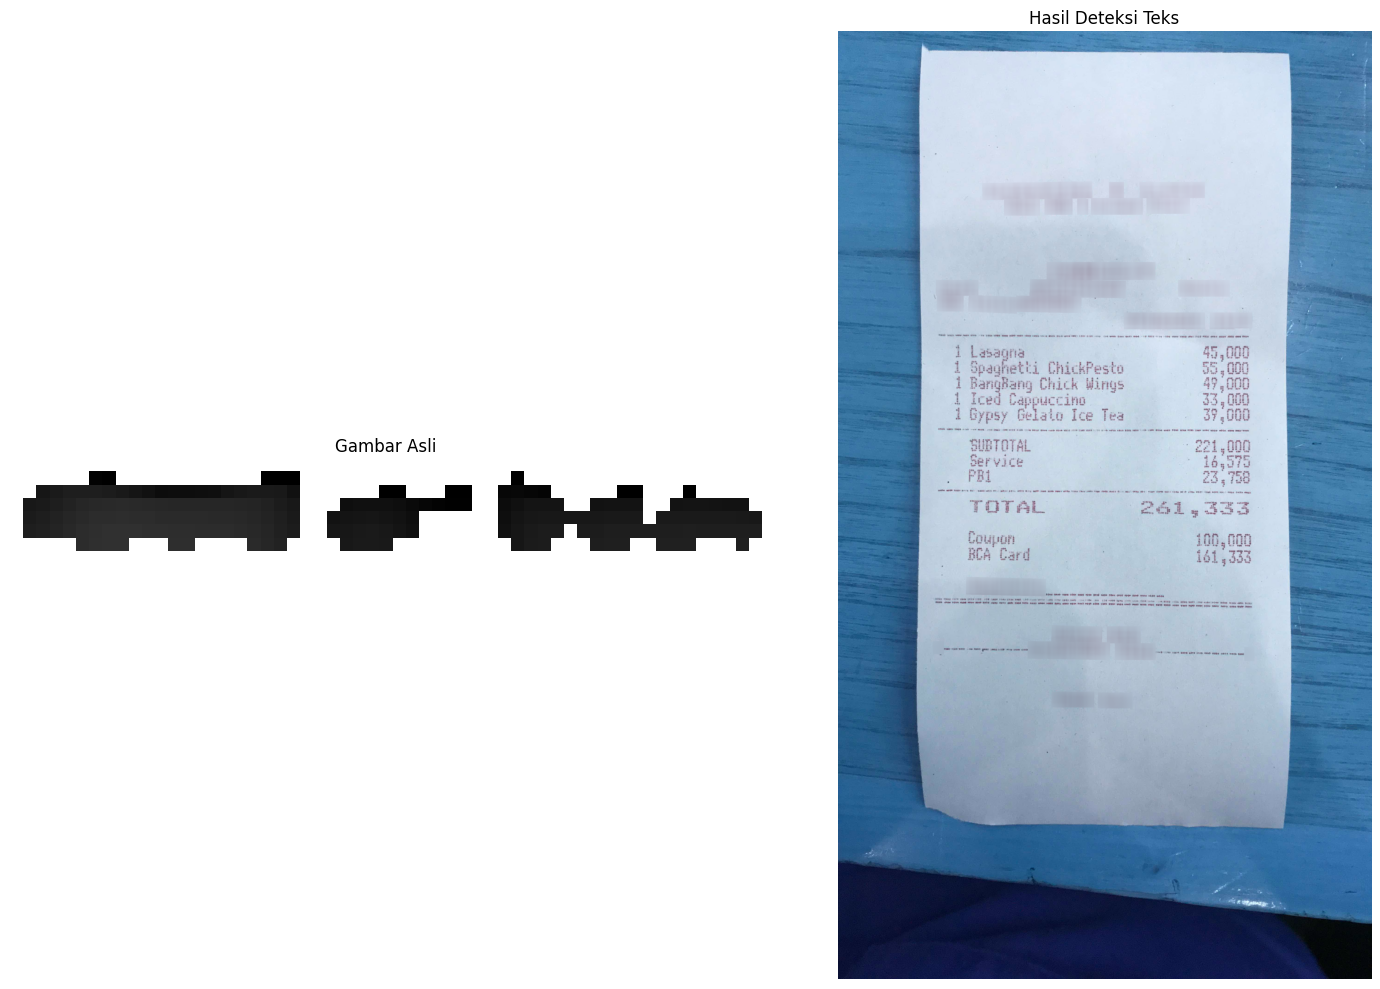

Hasil ekstraksi telah disimpan ke receipt_output.json


In [ ]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import json
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform

class ReceiptOCR:
    def __init__(self):
        # Konfigurasi path Tesseract jika diperlukan
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Untuk Windows
        pass

    def preprocess_image(self, image) -> np.ndarray:
        """
        Memproses gambar untuk meningkatkan akurasi OCR
        """
        img_orig = image
        # Baca gambar
        image = img_orig.copy()

        image = imutils.resize(image, width=1000)
        ratio = img_orig.shape[1] / float(image.shape[1])

        # Konversi ke grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        blurred = cv2.GaussianBlur(gray,(5,5,),0,)
        edged = cv2.Canny(blurred, 75, 200)

        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

            # initialize a contour that corresponds to the receipt outline
        receiptCnt = None
        # loop over the contours
        for c in cnts:
            # approximate the contour
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            # if our approximated contour has four points, then we can
            # assume we have found the outline of the receipt
            if len(approx) == 4:
                receiptCnt = approx
                break
        if receiptCnt is None:
            receipt = gray
        else:
            receipt = four_point_transform(img_orig, receiptCnt.reshape(4, 2) * ratio)
            receipt = cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY)
        
            
        # Apply adaptive thresholding
        binary = cv2.adaptiveThreshold(
            receipt, 
            255, 
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 
            21, 
            10
        )
        
        # Tingkatkan kontras menggunakan CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(binary)
        
        # Sharpening menggunakan unsharp masking
        gaussian_blur = cv2.GaussianBlur(enhanced, (0, 0), 3.0)
        sharpened = cv2.addWeighted(enhanced, 1.5, gaussian_blur, -0.5, 0)
        # Reduce noise
        denoised = cv2.fastNlMeansDenoising(sharpened)
        
        return denoised


    def extract_text_and_location(self, image) -> Tuple[List[Dict], np.ndarray]:
        """
        Mengekstrak teks dan lokasinya dari gambar struck
        """
        # Proses gambar
        processed_image = self.preprocess_image(image)
        
        # Buat salinan gambar untuk visualisasi
        visualization_image = image.copy()
        
        # Ekstrak data dengan Tesseract
        receipt_data = []
        
        # Gunakan Tesseract dengan output dictionary
        custom_config = r'--oem 3 --psm 6 --dpi 300'
        data = pytesseract.image_to_data(processed_image, output_type=pytesseract.Output.DICT, config=custom_config)
        n_boxes = len(data['text'])
        for i in range(n_boxes):
            # Skip empty text atau spasi
            if int(data['conf'][i]) > 30 and data['text'][i].strip() != '':
                # Dapatkan koordinat
                x = data['left'][i]
                y = data['top'][i]
                w = data['width'][i]
                h = data['height'][i]
                
                # Gambar kotak dan teks pada gambar visualisasi
                cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(visualization_image, data['text'][i], 
                          (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                          0.5, (255, 0, 0), 2)
                
                # Buat format yang mirip dengan contoh input
                word_data = {
                    "words": [{
                        "quad": {
                            "x1": x,
                            "y1": y,
                            "x2": x + w,
                            "y2": y,
                            "x3": x + w,
                            "y3": y + h,
                            "x4": x,
                            "y4": y + h
                        },
                        "text": data['text'][i],
                        # "confidence": data['conf'][i]
                    }],
                }
                receipt_data.append(word_data)
        
        return receipt_data, visualization_image


    def save_to_json(self, data: List[Dict], output_path: str):
        """
        Menyimpan hasil ekstraksi ke file JSON
        """
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump({"valid_line": data}, f, indent=2, ensure_ascii=False)

    def visualize_results(self, original_image: np.ndarray, visualization_image: np.ndarray):
        """
        Menampilkan hasil deteksi teks menggunakan matplotlib
        """
        plt.figure(figsize=(15, 10))
        
        # Tampilkan gambar asli
        plt.subplot(1, 2, 1)
        plt.title('Gambar Asli')
        plt.imshow(cv2.cvtColor(self.preprocess_image(original_image), cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        # Tampilkan gambar dengan hasil deteksi
        plt.subplot(1, 2, 2)
        plt.title('Hasil Deteksi Teks')
        plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

def main():
    # Contoh penggunaan
    ocr = ReceiptOCR()
    index = 5
    image_data = df.iloc[index]['image']
    image = Image.open(io.BytesIO(image_data['bytes']))
    image_data = np.array(image)
    
    # Ekstrak teks dan lokasi
    receipt_data, visualization_image = ocr.extract_text_and_location(image_data)

    dataset_gt = df['kotak'].iloc[index]
    predictions = receipt_data

    # Evaluasi
    results = evaluate_ocr(dataset_gt, predictions)
    print("Hasil evaluasi OCR:", results)

        # Tampilkan hasil deteksi
    ocr.visualize_results(image_data, visualization_image)
    
    # Simpan hasil ke JSON
    output_path = "receipt_output.json"
    ocr.save_to_json(receipt_data, output_path)

    print(f"Hasil ekstraksi telah disimpan ke {output_path}")

if __name__ == "__main__":
    main()

In [ ]:
%pip install doctr

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import matplotlib.pyplot as plt
import json
from typing import List, Dict


class ReceiptOCRWithDoctr:
    def __init__(self):
        # Inisialisasi model OCR dari Doctr
        self.model = ocr_predictor(pretrained=True)

    def preprocess_image(self, image: np.ndarray) -> np.ndarray:
        """
        Preprocessing gambar untuk meningkatkan akurasi OCR.
        """
        # Konversi ke grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply adaptive thresholding
        binary = cv2.adaptiveThreshold(
            gray, 
            255, 
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 
            21, 
            10
        )
        
        # Tingkatkan kontras
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced = clahe.apply(binary)
        return enhanced

    def extract_text_and_location(self, image: np.ndarray) -> List[Dict]:
        """
        Mengekstrak teks dan lokasi dari gambar menggunakan Doctr.
        """
        # Proses gambar untuk OCR
        processed_image = self.preprocess_image(image)

        # Konversi gambar ke format Doctr
        doc = DocumentFile.from_images(processed_image)
        
        # Prediksi dengan Doctr
        result = self.model(doc)

        # Parsing hasil prediksi
        receipt_data = []
        for page in result.pages:
            for block in page.blocks:
                for line in block.lines:
                    for word in line.words:
                        # Koordinat dalam format quad
                        x1, y1 = word.geometry[0]
                        x3, y3 = word.geometry[1]
                        quad = {
                            "x1": int(x1 * image.shape[1]),
                            "y1": int(y1 * image.shape[0]),
                            "x2": int(x3 * image.shape[1]),
                            "y2": int(y1 * image.shape[0]),
                            "x3": int(x3 * image.shape[1]),
                            "y3": int(y3 * image.shape[0]),
                            "x4": int(x1 * image.shape[1]),
                            "y4": int(y3 * image.shape[0]),
                        }
                        word_data = {
                            "words": [{"quad": quad, "text": word.value}]
                        }
                        receipt_data.append(word_data)
        return receipt_data

    def save_to_json(self, data: List[Dict], output_path: str):
        """
        Menyimpan hasil ekstraksi ke file JSON.
        """
        with open(output_path, "w", encoding="utf-8") as f:
            json.dump({"valid_line": data}, f, indent=2, ensure_ascii=False)

    def visualize_results(self, image: np.ndarray, receipt_data: List[Dict]):
        """
        Menampilkan hasil deteksi teks pada gambar.
        """
        vis_image = image.copy()
        for item in receipt_data:
            for word in item["words"]:
                quad = word["quad"]
                cv2.rectangle(
                    vis_image,
                    (quad["x1"], quad["y1"]),
                    (quad["x3"], quad["y3"]),
                    (0, 255, 0),
                    2
                )
                cv2.putText(
                    vis_image,
                    word["text"],
                    (quad["x1"], quad["y1"] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (255, 0, 0),
                    2
                )
        
        # Visualisasi dengan Matplotlib
        plt.figure(figsize=(15, 10))
        plt.title('Hasil Deteksi Teks dengan Doctr')
        plt.imshow(cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


def main():
    # Contoh penggunaan
    ocr = ReceiptOCRWithDoctr()

    # Load gambar (contoh menggunakan OpenCV)
    image_path = "path/to/your/receipt_image.jpg"
    image = cv2.imread(image_path)

    # Ekstrak teks dan lokasi
    receipt_data = ocr.extract_text_and_location(image)

    # Tampilkan hasil
    ocr.visualize_results(image, receipt_data)

    # Simpan ke file JSON
    output_path = "receipt_output_doctr.json"
    ocr.save_to_json(receipt_data, output_path)
    print(f"Hasil ekstraksi disimpan ke {output_path}")


if __name__ == "__main__":
    main()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import